# Stock Market Prediction

In [14]:
import pandas_datareader as pdr 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [13]:
# Shape of the data
df.shape

(1258, 15)

In [12]:
# Exmining the close feature

df1 = df.reset_index()['close']
df1.shape

(1258,)

In [19]:
df1.head(10)

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
5    130.120
6    129.360
7    128.650
8    127.800
9    127.420
Name: close, dtype: float64

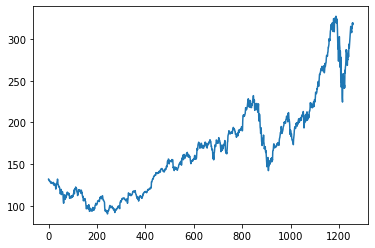

In [16]:
# plotting the close feature
plt.plot(df1)

In [17]:
# Since LSTM is very sensitive to the scale of the data  - the data has to be scaled
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
# Scaled values
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [24]:
# Splitting dataset into training and testing dataset
train_size = int(len(df1)*0.65)
test_size=len(df1) - (train_size)
train_data, test_data = df1[:train_size,:], df1[train_size:len(df1), :1]

In [25]:
len(train_data)

817

In [26]:
len(test_data)

441

In [27]:
#  A function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
# Reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [29]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [30]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [31]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [33]:
# Reshaping the input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating the Stacked LSTM model 

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [35]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)

Epoch 1/20
12/12 [==============================] - 2s 196ms/step - loss: 0.0210 - val_loss: 0.0589
Epoch 2/20
12/12 [==============================] - 1s 109ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 3/20
12/12 [==============================] - 1s 109ms/step - loss: 9.1407e-04 - val_loss: 0.0052
Epoch 4/20
12/12 [==============================] - 1s 114ms/step - loss: 7.2440e-04 - val_loss: 0.0038
Epoch 5/20
12/12 [==============================] - 1s 121ms/step - loss: 6.9126e-04 - val_loss: 0.0038
Epoch 6/20
12/12 [==============================] - 1s 115ms/step - loss: 6.6719e-04 - val_loss: 0.0039
Epoch 7/20
12/12 [==============================] - 1s 104ms/step - loss: 6.8594e-04 - val_loss: 0.0039
Epoch 8/20
12/12 [==============================] - 1s 117ms/step - loss: 6.1179e-04 - val_loss: 0.0040
Epoch 9/20
12/12 [==============================] - 1s 119ms/step - loss: 6.1219e-04 - val_loss: 0.0036
Epoch 10/20
12/12 [==============================] - 1s 116ms/step - los

In [38]:
# Prediction and checking performance
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [39]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [59]:
import math
from sklearn.metrics import mean_squared_error

# Training mse
math.sqrt(mean_squared_error(y_train,train_predict))

141.7820116737586

In [60]:
# Test mse performance
math.sqrt(mean_squared_error(y_test, test_predict))


235.0159917247054

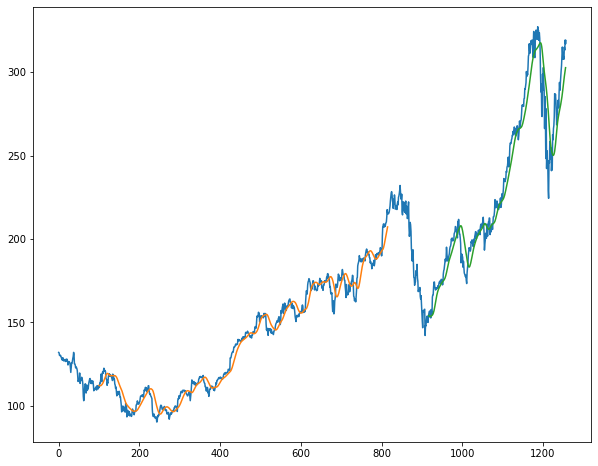

In [61]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(10,8))
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

441

In [51]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.90928644 0.91446108 0.91836929
 0.92106688 0.92271763 0.92352694 0.92369765 0.92340988 0.92281115
 0.92201519 0.92110431 0.92013592 0.91914731]
13 day output [[0.9181616]]
14 day input [0.95989192 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536
 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841
 0.96972895 0.9

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [56]:
len(df1)

1258

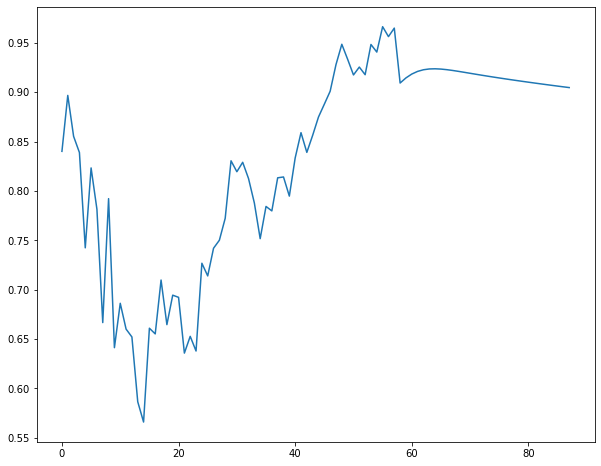

In [58]:
plt.figure(figsize=(10,8))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])